<head>
    <h2>University of Stirling</h2>
    <h2>Computing Science and Mathematics</h2>
    <h2>MATPMD1 Statistics for Data Science</h2>
    <h1>Chapter 7 Categorical Data Tests
    </h1>
</head>

<body>
    <h2>7.1 Using the ${\mathcal{X}}^2$ test with Categorical Data
    </h2>
    <p>One of the most common applications of the ${\mathcal{X}}^2$ test (chi-squared test) is in the analysis of so-called contingency tables. This is best illustrated with an example.
    </p>
    <p>In a clinical trial to assess the value of a new method of treatment (A) in comparison with the old method (B), patients were divided at random into two groups. Of 257 patients treated by method A, 41 died; of 244 patients treated by method B, 64 died.
    </p>

<body>
    <p>The data are displayed in the table below:
    </p>
    <table>
    <thead>
      <tr>
        <th>Treatment</th>
        <th>Death</th>
        <th>Survival</th>
        <th>Total</th>
      </tr>
    </thead>
    <tbody>
      <tr>
          <td>A</td>
          <td>41</td>
          <td>216</td>
          <td>257</td>
      </tr>
      <tr>
          <td>B</td>
          <td>64</td>
          <td>180</td>
          <td>244</td>
      </tr>
      <tr>
          <td>Total</td>
          <td>105</td>
          <td>396</td>
          <td>501</td>
      </tr>
    </tbody>
    </table>
    <p>This is often called a <strong>fourfold table</strong> or <strong>2x2 contingency table</strong>.

<body>
    <p>The total frequency, 501 in this example, is shown at the bottom right of the table. 
    </p>
    <p>This total frequency or grand total is split into two different dichotomies represented by the two horizontal rows of the table and the two vertical columns. 
    </p>
</body>

<body>
    <p>In this example, the rows represent the two treatments and the columns represent the two outcomes of treatment.
    </p>
    <p>Therefore there are 2x2 = 4 combinations of the row and column categories, and the corresponding frequencies occupy the four inner cells in the body of the table. 
    </p>
    <p>The total frequencies for the two row categories and those for the two column categories are shown at the right and at the foot, and are called the marginal totals.
</body>

In [33]:
# build up trial table
trial<-table(c("A","B","Total"),c("Death","Survival","Total"))
trial['A',] <- c(41,216,257)
trial['B',] <- c(64,180,244)
trial['Total',] <- c(105,396,501)

trial

       
        Death Survival Total
  A        41      216   257
  B        64      180   244
  Total   105      396   501

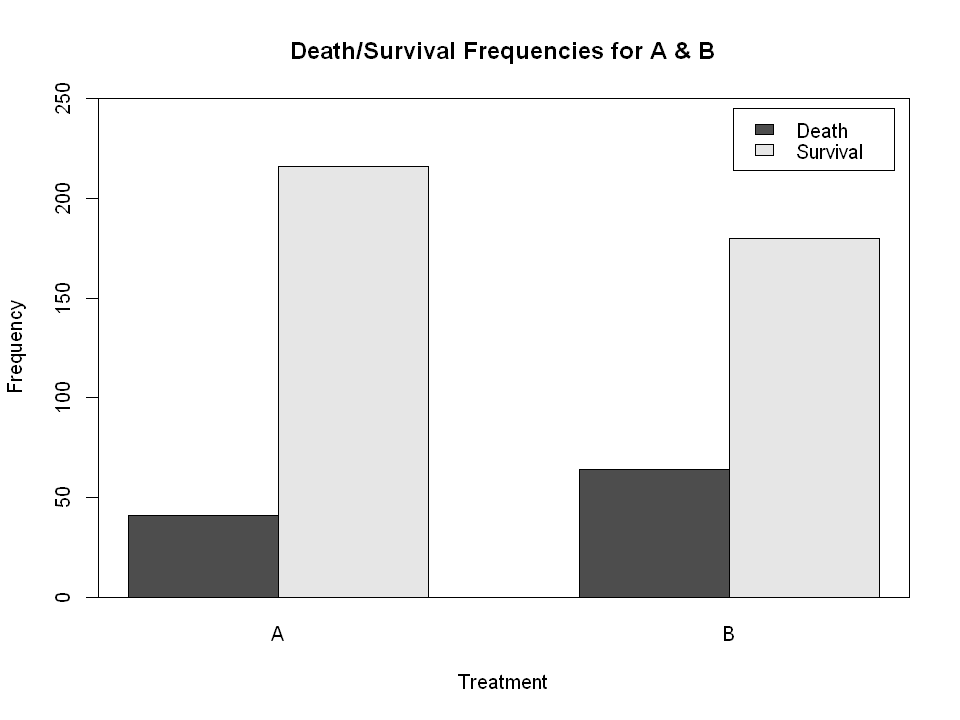

In [34]:
# build up trial matrix
trial<-matrix(c(41,216,257,64,180,244,105,396,501),nrow=3,ncol=3,byrow=TRUE)
dimnames(trial) = list(c("A","B","Total"),         # row names 
                    c("Death","Survival","Total")) # col names

# plot the frequencies
barplot (rbind(trial[1:2,'Death'],trial[1:2,'Survival']), beside=TRUE,
         names.arg=c("A","B"), legend.text=c("Death","Survival"),ylim=c(0,250),
         xlab="Treatment", ylab="Frequency", main="Death/Survival Frequencies for A & B")

box(lty="solid")

<body>
    <h3>7.1.1 ${\mathcal{X}}^2$ test Hypotheses
    </h3>
    <p>The Hypotheses we are going to test are:
    </p>
    <ul class="nobull">
        <li>$H_0 : $ Variables are not associated (they are independent so have equal proportions per category)
        </li>
        <li>$H_1 : $ Variables are related (they have unequal proportions between categories)
    </ul>
</body>

<body>
    <h3>7.1.2 Expected Frequency
    </h3>
    <p>In our treatment example we are concerned with possible differences between the fatality rates for the two treatments. 
    </p>
    <p>Given the marginal totals in the table we can calculate what numbers would have had to be observed in the body of the table to make the fatality rates for A and B equal.
    </p>
</body>

<body>
    <p>So, for example, the number of deaths for treatment A is expected to be:
    </p>
    <p>$$\dfrac{105 \times 257}{501} = 53.862$$
    </p>
    <p>since the overall fatality rate is 105/501 and there are 257 individuals with Treatment A. 
    </p>
    <p>Similary for Treatment B the expected number of deaths is $\frac{105 \times 244}{501}$.
    </p>
</body>

<body>
    <p>The equation for expected frequency is:
    </p>
    <p>$$\begin{equation}\mathrm{Expected~Frequency} = \dfrac{\mathrm{Column~Total}\times\mathrm{Row~Total}}{\mathrm{Overall~Total}} \label{eq:71} \tag{7.1}\end{equation}$$
    </p>
</body>

<body>
    <p>Expected frequencies can be obtained for each of the four inner cells, and are shown in the tables below, where the observed and expected number are distinguished by the letters O and E. 
    </p>
    <div style="float: left; margin-right: 20px;">
      <table>
         <caption style="text-align:center"><strong>Observed Frequencies (O)</strong></caption>
        <thead>
          <tr>
            <th>Treatment</th>
            <th>Death</th>
            <th>Survival</th>
            <th>Total</th>
          </tr>
        </thead>
        <tbody>
          <tr>
              <td>A</td>
              <td>41</td>
              <td>216</td>
              <td>257</td>
          </tr>
          <tr>
              <td>B</td>
              <td>64</td>
              <td>180</td>
              <td>244</td>
          </tr>
          <tr>
              <td>Total</td>
              <td>105</td>
              <td>396</td>
              <td>501</td>
          </tr>
        </tbody>
      </table>
    </div>
    <div style="float: left">
      <table>
        <caption style="text-align:center"><strong>Expected Frequencies (E)</strong></caption>
        <thead>
          <tr>
            <th>Treatment</th>
            <th>Death</th>
            <th>Survival</th>
            <th>Total</th>
          </tr>
        </thead>
        <tbody>
          <tr>
              <td>A</td>
              <td>53.862</td>
              <td>203.138</td>
              <td>257</td>
          </tr>
          <tr>
              <td>B</td>
              <td>51.138</td>
              <td>192.862</td>
              <td>244</td>
          </tr>
          <tr>
              <td>Total</td>
              <td>105</td>
              <td>396</td>
              <td>501</td>
          </tr>
        </tbody>
      </table>
    </div>
</body>

<body>
    <p>The expected numbers are not integers and have been rounded off to three decimal places. Clearly one could not observe 53.862 individuals in a particular cell. These expected numbers should be thought of as expectations or mean values over a large number of possible values with the same marginal totals as those observed, when the null hypothesis is true.
    </p>
    <p>Note that the values of E sum, over both rows and columns, to the observed marginal totals. It follows that the discrepancies, measured by the differences O-E, add to zero along the rows and columns; in other words, the four discrepancies have the same magnitude (12.862 in this
example), two being positive and two being negative.
    </p>
</body>

<body>
    <h3>7.1.3 ${\mathcal{X}}^2$ Test Statistic
    </h3>
    <p>In a rough sense, the greater the discrepancies between Observed and Expected, the more evidence we have against the null hypothesis, Therefore, it would seem reasonable to base a significance test on these discrepancies. It also seems reasonable to take account of the absolute size of frequencies: a discrepancy of 5 is much more important if E=5 than if E=100.
    </p>
    <p>It turns out to be appropriate to calculate the following index (the Test Statistic):
    </p>
</body>

<body>
    <p>$$\begin{equation}\mathrm{X}^2 = \sum{\dfrac{(O-E)^2}{E}} \quad \sim \large{\mathcal{X}}^2((r-1)(c-1)) \label{eq:72} \tag{7.2}\end{equation}$$
    </p>
    <p>the summation being over the four inner cells of the table. The contributions to $\mathrm{X}^2$ from the four cells are shown in the previous table. 
    </p>
</body>

<body>
    <p>In our example the total (Observed Test Statistic) is
    </p>
    <p>$$\begin{align}\mathrm{X}^2 &= \dfrac{(41-53.862)^2}{53.862} + \dfrac{(216-203.138)^2}{203.138} \\
                                      & \quad + \dfrac{(64-51.138)^2}{53.138} + \dfrac{(180-192.862)^2}{192.862} \\ 
                                   &= 3.071 + 0.814 + 3.235 + 0.858 \\
                                   &= 7.798 \end{align}$$
    </p>
</body>

<body>
    <h3>7.1.4 $\mathcal{X}^2$ Test Statistic degrees of freedom
    </h3>
    <p>We now need to consider the number of degrees of freedom in the contingency table. 
    </p>
    <p>The number of degrees of freedom is the number of cells in the contingency table that, given the marginal totals, can be set independently. 
    </p>
</body>
<body>

<body>
    <p>So, for example, in a 2x2 contingency table, only one cell is independent, therefore we have only one degree of freedom. 
    </p>
    <p>In general, in a contingency table with $r$ rows and $c$ columns, there are: 
    </p>
    <p>$\quad (r-1) \times (c-1)$ degrees of freedom.
    </p>
</body>

<body>
    <h3>7.1.5 Applying the $\mathcal{X}^2$ Test
    </h3>
    <p>Returning now to our example with a 2x2 table we see that, on the null hypothesis, $\mathrm{X}^2$ follows the $\mathcal{X}^2(1)$ distribution, the approximation improving as the expected numbers get larger. 
    </p>
    <p>Reference to the $\mathcal{X}^2$ table shows that the observed value of 7.978 is beyond the 0.01 point of the $\mathcal{X}^2(1)$ distribution, and the difference between the two fatality rates is therefore significant at the 1 per cent level.
    </p>
</body>

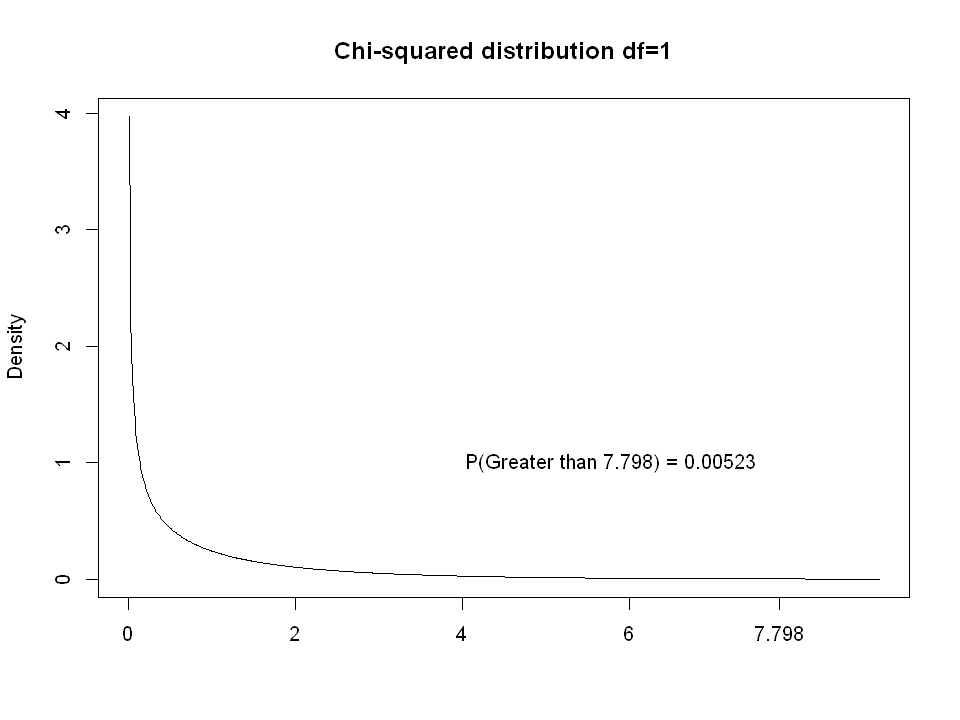

In [35]:
# plot the chi-squared distribution and observed statistic
x<-seq(0,9,0.01)
chisqdens <- dchisq(x,1)
pvalx = 7.798
pval= pvalx*100+1
plot(x,chisqdens,type="l",ylab="Density",main="Chi-squared distribution df=1",xlab="",xaxt="n")
axis(1,at=c(0,2,4,6,pvalx),labels=c(0,2,4,6,pvalx))
text(x[pval]-2,chisqdens[pval]+1,labels="P(Greater than 7.798) = 0.00523")

<body>
    <p>The Rejection Region at the 5% significance level is calculated as
    </p>
    <p>$$P({\mathcal{X}}^2(1) \gt c ) = 0.05$$
    </p>
    <p>and for the ${\mathcal{X}}^2(1)$ distribution we find $c=3.84$. So, the rejection region for our test at the 5% significance level is,
    </p>
    <p>$$P({\mathcal{X}}^2(1) \gt 3.84 )$$
    </p>
</body>

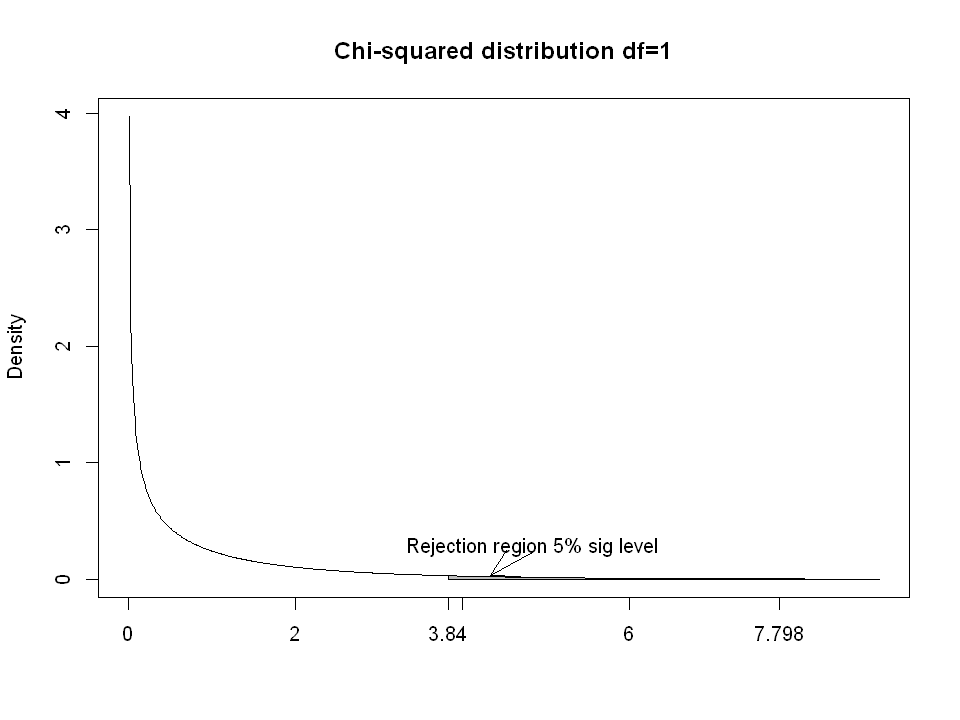

In [36]:
# plot the chi-squared distribution
x<-seq(0,9,0.01)
chisqdens <- dchisq(x,1)

# and the rejection region
rejx = 3.84
rej= rejx*100+1
pvalx = 7.798
pval= pvalx*100+1
plot(x,chisqdens,type="l",ylab="Density",main="Chi-squared distribution df=1",xlab="",xaxt="n")
polygon(c(x[rej:length(x)],x[length(x)],x[rej]),c(chisqdens[rej:length(x)],0,0),col="gray")
axis(1,at=c(0,2,rejx,4,6,pvalx),labels=c(0,2,rejx,4,6,pvalx))
arrows(x[rej]+1,chisqdens[rej]+0.2,x[rej]+0.5,chisqdens[rej])
text(x[rej]+1,chisqdens[rej]+0.25,labels="Rejection region 5% sig level")

<body>
    <p>Therefore for example the conclusion drawn from our Hytpothesis test (Section 8.1.1) is that we reject $H_0$ in favour of $H_1$ at the 5% significance level as the Observed Statistic $\mathrm{X}^2$ is greater than 3.84.
    </p>
</body>

<body>
    <h3>7.1.6 $\mathcal{X}^2$ Test Important Points
    </h3>
    <p>It is important to remember that the $\mathrm{X}^2$ index can only be calculated from a 2x2 table in which the entries are frequencies. A common error is to use it for a table in which the entries are mean values of a certain variable. This practice is completely erroneous.
    </p>
</body>

<body>
    <p>The method can be easily generalised to a contingency table with any number of rows and columns. However, the assumption that $\mathrm{X}^2$ approximates to ${\mathcal{X}}^2$ is not valid if the cell frequencies are too small. A useful rule is as follows:
    </p>
    <ul class="nobull">
        <li>If df = 1, then no cell can have an expected frequency of less than 5.
        </li><br>
        <li>If df $\gt$ 1, then no more than 20% of the cells can have an expected frequency of less than 5, and no cell an expected frequency of less than 1.
        </li>
    </ul>
</body>

<body>
    <h3>7.1.7 $\mathcal{X}^2$ Test Example
    </h3>
    <p>In a survey concerned with changes in working procedures the following table was produced:
    <table>
        <caption style="text-align:center"><strong>Opinion on changes in working procedures</strong></caption>
        <thead>
          <tr>
            <th></th>
            <th>In favour</th>
            <th>Opposed</th>
            <th>Undecided</th>
          </tr>
        </thead>
        <tbody>
          <tr>
              <td>Skilled Workers</td>
              <td>19</td>
              <td>31</td>
              <td>35</td>
          </tr>
          <tr>
              <td>Unskilled Workers</td>
              <td>55</td>
              <td>20</td>
              <td>15</td>
          </tr>
        </tbody>
    </table>
</body>

<body>
    <ol class="a">
        <li>Calculate the proportions of each Opinion group that are Skilled Workers.<br>
            Does this suggest a relationship between opinion and type of worker?
        </li>
        <li>Test the hypotheses that the opinion on working procedures is independent of whether workers are classified as skilled or unskilled.
        </li>
    </ol>
</body>

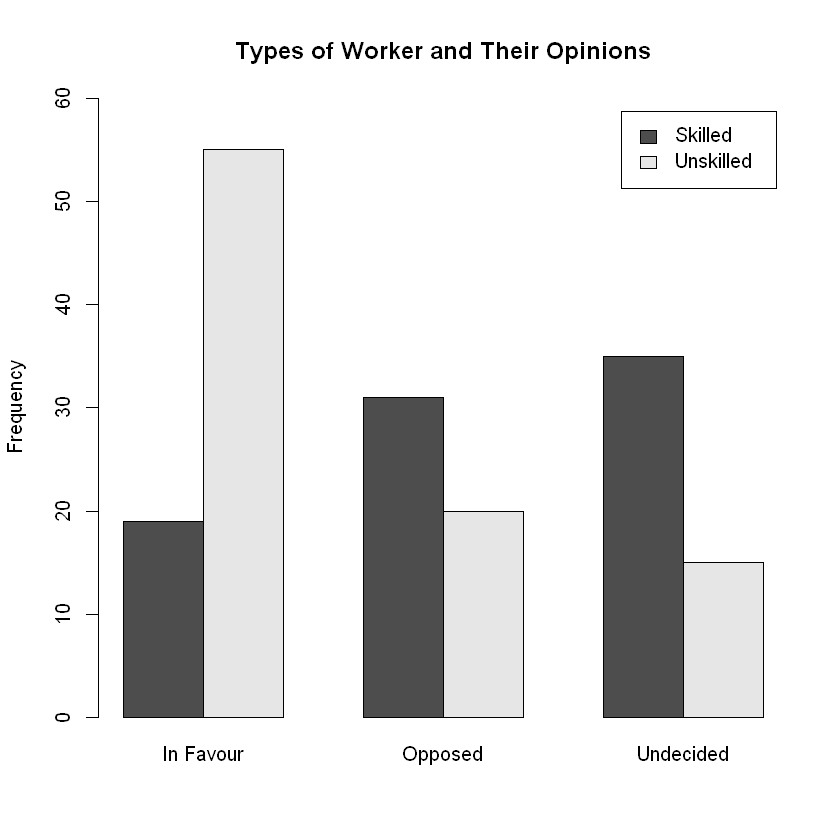

In [1]:
# build up table of workers and opinions


opinions<-matrix(0,nrow=3,ncol=4,byrow=TRUE)
dimnames(opinions) <- list(c("Skilled","Unskilled","Total"),      # row names 
                           c("For","Against","Undecided","Total")) # col names
opinions['Skilled',] <- c(19,31,35,0)
opinions['Unskilled',] <- c(55,20,15,0)
opinions['Total',] <- c(sum(opinions[1:2,'For']),
                        sum(opinions[1:2,'Against']),
                        sum(opinions[1:2,'Undecided']),
                        0)
opinions['Skilled','Total'] <- c(sum(opinions['Skilled',1:3]))
opinions['Unskilled','Total'] <- c(sum(opinions['Unskilled',1:3]))
opinions['Total','Total'] <- c(sum(opinions['Total',1:3]))

# plot frequency of opinions for each group
barplot (rbind(opinions['Skilled',1:3],opinions['Unskilled',1:3]), beside=TRUE,
         names.arg=c("In Favour","Opposed","Undecided"), legend.text=c("Skilled","Unskilled"),ylim=c(0,60),
         xlab="", ylab="Frequency", main="Types of Worker and Their Opinions")

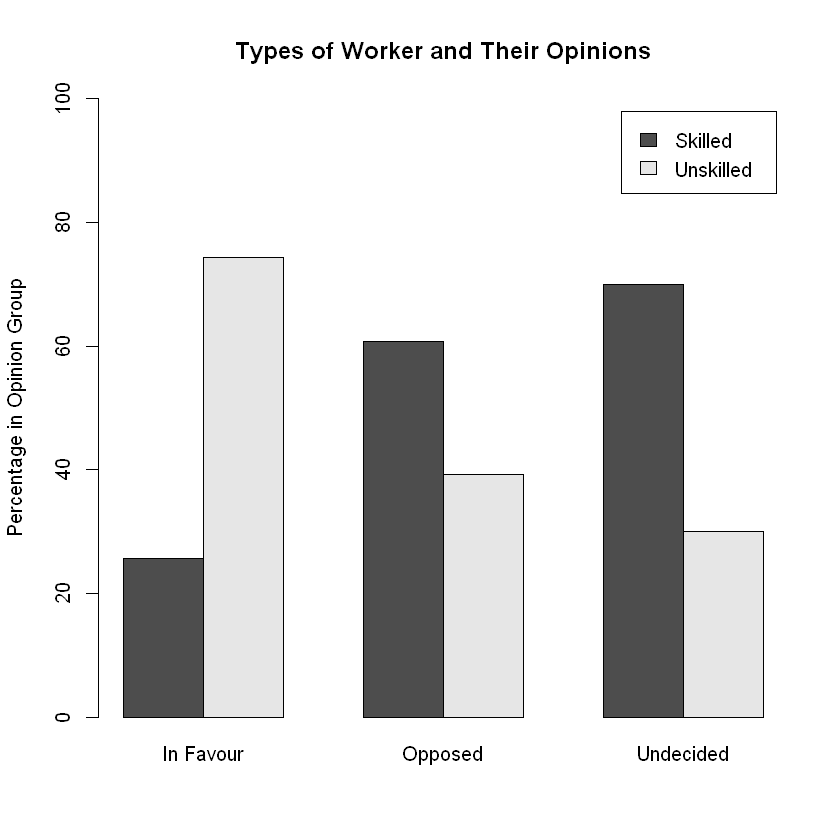

In [5]:
# build up table of workers and opinions

opinions<-matrix(0,nrow=3,ncol=4,byrow=TRUE)
dimnames(opinions) <- list(c("Skilled","Unskilled","Total"),      # row names 
                           c("For","Against","Undecided","Total")) # col names
opinions['Skilled',] <- c(19,31,35,0)
opinions['Unskilled',] <- c(55,20,15,0)
opinions['Total',] <- c(sum(opinions[1:2,'For']),
                        sum(opinions[1:2,'Against']),
                        sum(opinions[1:2,'Undecided']),
                        0)
opinions['Skilled','Total'] <- c(sum(opinions['Skilled',1:3]))
opinions['Unskilled','Total'] <- c(sum(opinions['Unskilled',1:3]))
opinions['Total','Total'] <- c(sum(opinions['Total',1:3]))

# plot percentage within each group with particular opinion
barplot (rbind(100*opinions['Skilled',1:3]/opinions['Total',1:3],100*opinions['Unskilled',1:3]/opinions['Total',1:3]), beside=TRUE,
         names.arg=c("In Favour","Opposed","Undecided"), legend.text=c("Skilled","Unskilled"),ylim=c(0,100),
         xlab="", ylab="Percentage in Opinion Group", main="Types of Worker and Their Opinions")

<body>
    <h3>7.1.8 $\mathcal{X}^2$ Improvements
    </h3>
    <p>In general, two methods of improvement to the $\mathcal{X}^2$ test are widely used: the application of a continuity correction and the calculation of exact probabilities.
    </p>
</body>

<body>
    <h3>7.1.9 Continuity Correction for Fourfold Tables
    </h3>
    <p>This method was described by F Yates and is often called the Yates
Correction. If the number of degrees of freedom is 1, a small correction
factor is applied to account for the fact that the distribution is continuous, whereas the observed frequencies are discrete.
    </p>
</body>

<body>
    <p>Thus, for df=1, $\mathrm{X}^2$ is calculated from
    </p>
    <p>$$\mathrm{X}^2_{Yates} = \sum{\dfrac{(|O-E|-0.5)^2}{E}}$$
    </p>
</body>

<body>
    <p>And, for a 2x2 table with frequencies:
    </p>
    <table>
        <thead>
            <th></th>
            <th></th>
            <th></th>
            <th>Total</th>
        </thead>
        <tbody>
          <tr>
              <td></td>
              <td>$a$</td>
              <td>$b$</td>
              <td>$r_1$</td>
          </tr>
          <tr>
              <td></td>
              <td>$c$</td>
              <td>$d$</td>
              <td>$r_2$</td>
          </tr>
          <tr>
              <td><strong>Total</strong></td>
              <td>$s_1$</td>
              <td>$s_2$</td>
              <td>$N$</td>
          </tr>
        </tbody>
    </table>
</body>

<body>
    <p>the continuity corrected version of the alternative formula is
    </p>
    <p>$$\mathrm{X}^2_{Yates} = \dfrac{N(|ad-bc|-N/2)^2}{r_{1}r_{2}s_{1}s_{2}}$$
    </p>
</body>

<body>
    <h3>7.1.10 The Exact Test for Fourfold Tables
    </h3>
    <p>Even with the continuity correction there will be some doubt about the adequacy of the $\mathcal{X}^2$ approximation when the frequencies are particularly small. An exact test was suggested almost simultaneously in the mid-1930's by Fisher, Irwin and Yates. 
    </p>
    <p>This consists of calculating the exact probabilities in the distribution described in the Previous subsection. 
    </p>
</body>

<body>
    <p>For a table with frequencies:
    </p>
    <table>
        <thead>
            <th></th>
            <th></th>
            <th></th>
            <th>Total</th>
        </thead>
        <tbody>
          <tr>
              <td></td>
              <td>$a$</td>
              <td>$b$</td>
              <td>$r_1$</td>
          </tr>
          <tr>
              <td></td>
              <td>$c$</td>
              <td>$d$</td>
              <td>$r_2$</td>
          </tr>
          <tr>
              <td><strong>Total</strong></td>
              <td>$s_1$</td>
              <td>$s_2$</td>
              <td>$N$</td>
          </tr>
        </tbody>
    </table>
</body>

<body>
    <p>The probability of such a table of frequencies is given by the formula:
    </p>
    <p>$$\dfrac{r_{1}! r_{2}! s_{1}! s_{2}!}{N!a!b!c!d!}$$
    </p>
    <p>Given any observed table, the probabilities of all tables with the same marginal totals can be calculated, and the p-value for the significance test calculated by summation.
    </p>
</body>

<body>
    <h2>7.2 Testing Whether a Distribution is Normal
    </h2>
    <p>A useful use of the $\mathcal{X}^2$ test is to check whether the data have a Normal Distribution or not.
    </p>
</body>

<body>
    <p>For example, consider drug levels measured in a random group of 251
subjects receiving a particular drug. The data are as follows:
    </p>
    <table>
        <tbody>
            <tr class="odd">
                <td>mg/ml</td>
                <td>1.0</td>
                <td>1.1</td>
                <td>1.2</td>
                <td>1.3</td>
                <td>1.4</td>
                <td>1.5</td>
                <td>1.6</td>
                <td>1.7</td>
                <td>1.8</td>
            </tr>
            <tr class="even">
                <td>No of Subjects</td>
                <td>12</td>
                <td>14</td>
                <td>18</td>
                <td>42</td>
                <td>60</td>
                <td>50</td>
                <td>30</td>
                <td>15</td>
                <td>10</td>
            </tr>
        </tbody>
    </table>
    <p>Do these data follow a Normal Distribution?
    </p>
</body>

<body>
    <p>An informal solution is to plot the frequencies and see if the distribution looks normal.
    </p>
</body>

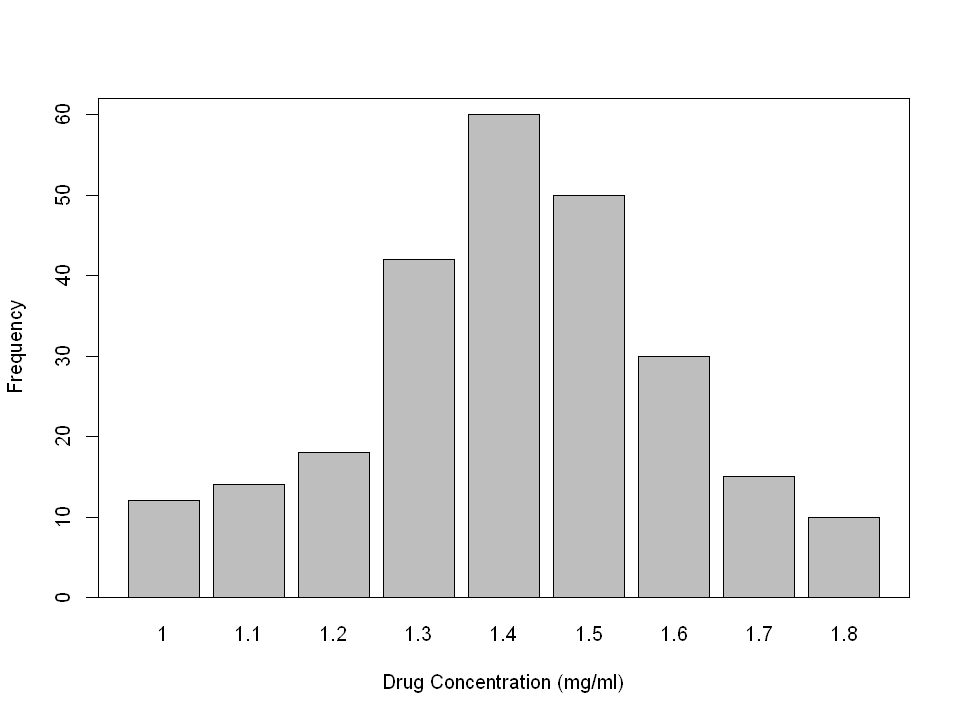

In [39]:
# use barplot to show frequencies of each drug concentration

drugs.df <- data.frame(level=seq(1.0,1.8,0.1),
                       freq=c(12,14,18,42,60,50,30,15,10))
barplot(drugs.df$freq,
        names.arg=drugs.df$level,
        xlab="Drug Concentration (mg/ml)",
        ylab="Frequency",
        ylim=c(0,62))
box(lty="solid")

<body>
    <p>More formally we can use our $\mathcal{X}^2$ test. The Hypotheses are:
    </p>
    <ul class="nobull">
        <li>$H_0 : $ Data follow a Normal Distribution
        </li>
        <li>$H_1 : $ Data follow some other Distribution
        </li>
        <li>Significance Level 0.05
        </li>
        <li>Test Statistic $\mathrm{X}^2=\sum\limits_{i=1}^{C}\frac{(O_i-E_i)^2}{E_i}$<br>
            where C = No. of classes
        </li>
    </ul>
</body>

<body>
    <p>To calculate the Observerd Test Statistic we first have to find the expected values.
    </p>
    <p>From the example data we find that the mean drug level is $\bar{x}=1.4$ with standard deviation $s=0.2$, and there are $n=251$ observations.
    </p>
    <p>To find expected values from the normal distribution $\mathcal{N}(1.4,0.2^2)$ we transform to standard normal distribution to find the expected frequency for each drug level.
    </p>
</body>

<body>
    <p>We then build up a table translating the probability of being within a particular level to the expected frequency:
    </p>
    <ol class="i">
        <li>Transfrom drug level X to standard normal using $Z = \frac{X-\bar{x}}{s}$
        </li>
        <li>Take $b$ as the boundary value midway between subsequent $Z$ values.
        </li>
        <li>Find $p = $ P(lower b $\lt$ Z $\lt$ upper b) using $\mathcal{N}(0,1)$ tables.
        </li>
        <li>Use $p \times n$ to find the Expected frequency.
        </li>
    </ol>
</body>

<body>
    <table>
        <thead>
            <th>$X$</th>
            <th>$Z$</th>
            <th>lower b</th>
            <th>upper b</th>
            <th>P(lb$\lt$Z$\lt$ub)</th>
            <th>Expected</th>
            <th>Observed</th>
        </thead>
        <tbody>
          <tr>
              <td>1.0</td>
              <td>-2.0</td>
              <td>-2.25</td>
              <td>-1.75</td>
              <td>0.028</td>
              <td>7.0</td>
              <td>12</td>
          </tr>
          <tr>
              <td>1.1</td>
              <td>-1.5</td>
              <td>-1.75</td>
              <td>-1.25</td>
              <td>0.065</td>
              <td>16.5</td>
              <td>14</td>
          </tr>
          <tr>
              <td>1.2</td>
              <td>-1.0</td>
              <td>-1.25</td>
              <td>-0.75</td>
              <td>0.121</td>
              <td>30.4</td>
              <td>18</td>
          </tr>
          <tr>
              <td>1.3</td>
              <td>-0.5</td>
              <td>-0.75</td>
              <td>-0.25</td>
              <td>0.175</td>
              <td>43.8</td>
              <td>42</td>
          </tr>
          <tr>
              <td>1.4</td>
              <td>0</td>
              <td>-0.25</td>
              <td>0.25</td>
              <td>0.197</td>
              <td>49.6</td>
              <td>60</td>
          </tr>
          <tr>
              <td>1.5</td>
              <td>0.5</td>
              <td>0.25</td>
              <td>0.75</td>
              <td>0.175</td>
              <td>43.8</td>
              <td>50</td>
          </tr>
          <tr>
              <td>1.6</td>
              <td>1.0</td>
              <td>0.75</td>
              <td>1.25</td>
              <td>0.121</td>
              <td>30.4</td>
              <td>30</td>
          </tr>
          <tr>
              <td>1.7</td>
              <td>1.5</td>
              <td>1.25</td>
              <td>1.75</td>
              <td>0.065</td>
              <td>16.5</td>
              <td>15</td>
          </tr>
          <tr>
              <td>1.8</td>
              <td>2.0</td>
              <td>1.75</td>
              <td>2.25</td>
              <td>0.028</td>
              <td>7.0</td>
              <td>10</td>
          </tr>
        </tbody>
    </table>
</body>

<body>
    <p>Now we can calculate the Observed Test Statistic
    </p>
    <p>$$\mathrm{X}^2 = \dfrac{(12-7)^2}{7} + \dfrac{(14-16.5)^2}{16.5} + ... + \dfrac{(10-7)^2}{7} \\
        = 13.6$$
    </p>
</body>

<body>
    <p>and the rejection threshold for Significance Level 0.05 (NB this is always one-sided):
    </p>
    <ul class="nobull">
        <li>$\mathcal{X}^2(6;0.05) = 12.59$
        </li>
        <li>where df $=$ (no. of classes) - 1 - (no. of parameters estimated)<br>
            $\quad \quad \quad = 9 - 1 - 2$
        </li>
    </ul>
</body>

<body>
    <p>So we will Reject $H_0$ in favour of $H_1$ at the 5% significance level only if $\mathrm{X}^2 \gt 12.59$.
    </p>
    <p>The p-value for $P(\mathcal{X}^2(6) \gt 13.6) = 0.038$
    </p>
</body>

<body>
    <p>We can conclude:
    </p>
    <ol>
        <li>The Observed Test Statistic $\mathrm{X}^2 = 13.6$ which is greater than 12.59 so we can reject $H_0$ in favour of $H_1$ at the 5% significance level. Therefore there is sufficient evidence to conclude that the data does not follow a Normal Distribution.
        </li>
        <li>$p \lt 0.05$ so there is sufficient evidence at the 5% level to conclude that the data does not follow a Normal Distribution.
        </li>
    </ol>
</body>

<body>
    <h2>7.3 Testing Whether a Distribution is Uniform
    </h2>
    <p>In a similar fashion to using the $\mathcal{X}^2$ test to determine whether a distribution is normal, we can also test whether a distribuion is Uniform. In this distribution all outcomes have an equal chance of occurring.
    </p>
</body>

<body>
    <p>The hyphothesis test we perform is:
    </p>
    <ul class="nobull">
        <li>$H_0 : $ Data follow a Uniform distribution
        </li>
        <li>$H_1 : $ Data follow some other distribution
        </li>
        <li>Significance level 0.05
        </li>
        <li>Test Statistic: <br>
            $\mathrm{X}^2 = \sum\limits_{i=1}^{C}\frac{(O_i-E_i)^2}{E_i} \quad $ where C = no. of classes
        </li>
    </ul>
</body>

<body>
    <h3>7.3.1 Uniform Distribution test example
    </h3>
    <p>Consider data regarding the number of defective items detected on an assembly line over the course of a week. We want to know if there is an equal chance of a defective item being found on each day of the week.
    </p>
</body>

<body>
    <table>
        <thead>
            <th>Day</th>
            <th>Defective items</th>
            <th>Day</th>
            <th>Expected</th>
        </thead>
        <tbody>
          <tr>
              <td>Mon</td>
              <td>20</td>
              <td>Mon</td>
              <td>18</td>
          </tr>
          <tr>
              <td>Tues</td>
              <td>17</td>
              <td>Tues</td>
              <td>18</td>
          </tr>
          <tr>
              <td>Wed</td>
              <td>16</td>
              <td>Wed</td>
              <td>18</td>
          </tr>
          <tr>
              <td>Thurs</td>
              <td>14</td>
              <td>Thurs</td>
              <td>18</td>
          </tr>
          <tr>
              <td>Fri</td>
              <td>23</td>
              <td>Fri</td>
              <td>18</td>
          </tr>
          <tr>
              <td>Total</td>
              <td>90</td>
              <td></td>
              <td>90</td>
          </tr>
        </tbody>
    </table>
</body>

<body>
    <p>From the data can you tell whether there is an equal chance of a defect occuring on any day of the week?
    </p>
    <p>Do the following bargraphs make it any clearer?
    </p>
</body>

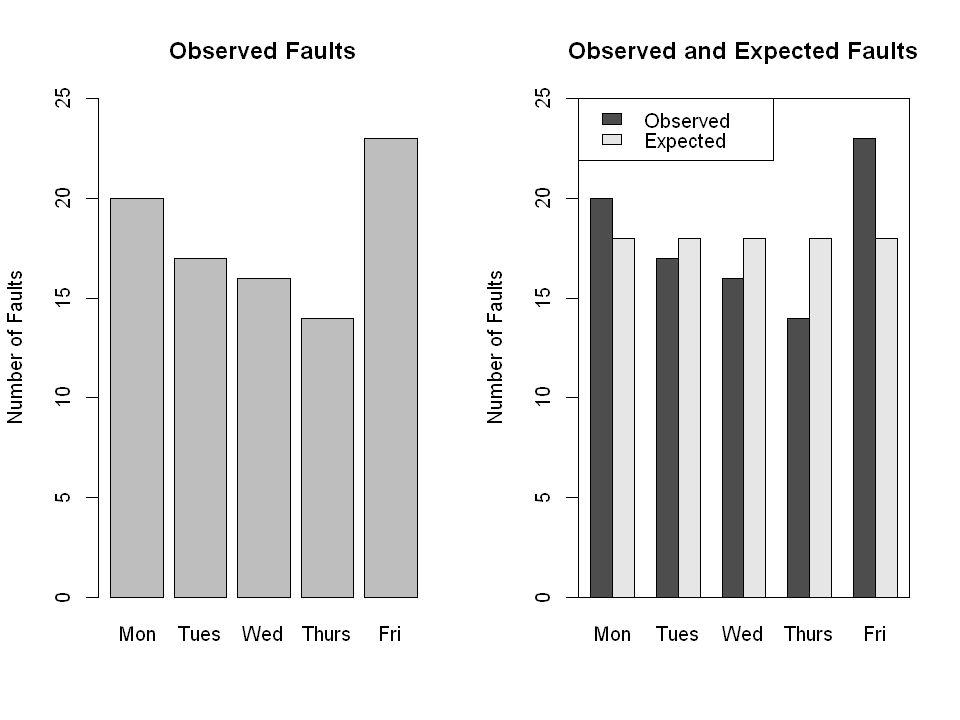

In [40]:
faults.df <- data.frame(day=c("Mon","Tues","Wed","Thurs","Fri"),
                        freq=c(20,17,16,14,23),
                        exp=c(18,18,18,18,18))
# side by side plot
par(mfrow = c(1,2))

# plot observed fault frequencies, the observed and expected side by side
barplot(faults.df$freq,
        names.arg=faults.df$day,
        ylab="Number of Faults",
        ylim=c(0,25),
        main="Observed Faults")
barplot (rbind(faults.df$freq,faults.df$exp), beside=TRUE,
         names.arg=faults.df$day, 
         legend.text=c("Observed","Expected"),args.legend=list(x='topleft'),
         ylim=c(0,25),ylab="Number of Faults", 
         main="Observed and Expected Faults")
box(lty="solid")

<body>
    <p>From just looking at the plots it is unclear whether the faults follow a uniform distribution or not. Therefore we use the Observed Test Statistic:
    </p>
    <p>$$\begin{align}\mathrm{X}^2 = & \frac{(20-18)^2}{18}+\frac{(17-18)^2}{18}+\frac{(16-18)^2}{18}+ \\
        & \frac{(14-18)^2}{18}+\frac{(23-18)^2}{18} \\
        \\
        &= 2.78 \end{align}$$
    </p>
</body>

<body>
    <p>The threshold for our Rejection Region at significance level 0.05 is,
    </p>
    <p>$$\mathcal{X}^2(4;0.05) = 9.49$$
    </p>
    <p>where df $= 5 - 1 - 0 = 4$. (Note the 0 comes from not estimating any parameters.)
    </p>
</body>

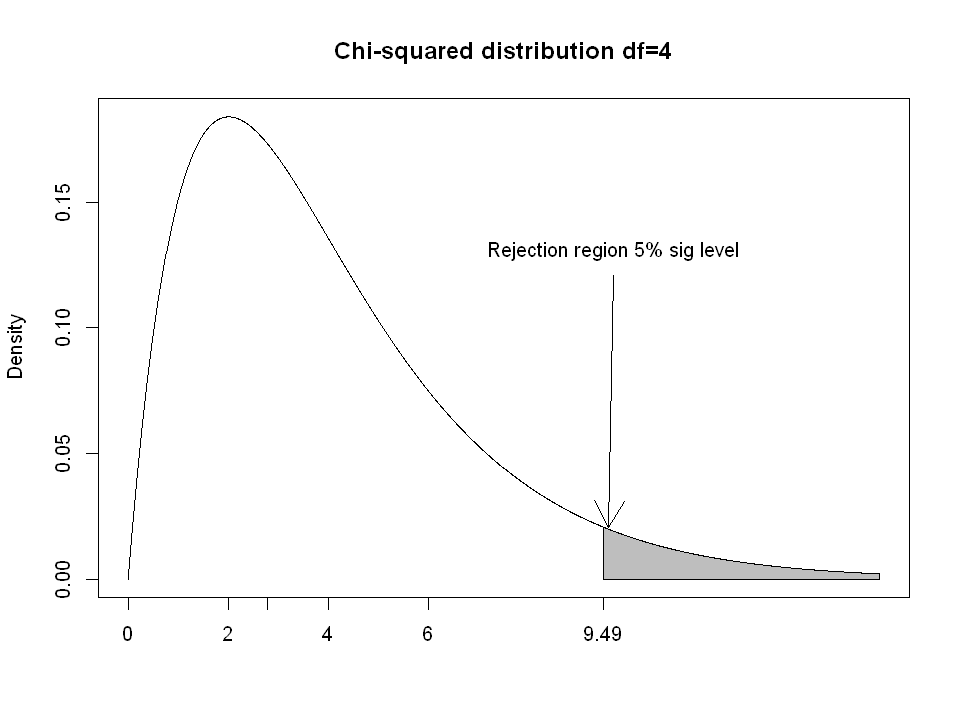

In [41]:
# plot chi-squared(4)
x<-seq(0,15,0.01)
chisqdens <- dchisq(x,4)

# highlight the rejection region
rejx = 9.49
rej= rejx*100+1
pvalx = 2.78
pval= pvalx*100+1
plot(x,chisqdens,type="l",ylab="Density",main="Chi-squared distribution df=4",xlab="",xaxt="n")
polygon(c(x[rej:length(x)],x[length(x)],x[rej]),c(chisqdens[rej:length(x)],0,0),col="gray")
axis(1,at=c(0,2,rejx,4,6,pvalx),labels=c(0,2,rejx,4,6,pvalx))

# and point an arrow to it
arrows(x[rej]+0.2,chisqdens[rej]+0.1,x[rej]+0.1,chisqdens[rej])
text(x[rej]+0.2,chisqdens[rej]+0.11,labels="Rejection region 5% sig level")

<body>
    <p>We can conclude that:
    </p>
    <ul>
        <li>The Observed Test Statistic, $\mathrm{X}^2=2.78$, is not in the Rejection Region as it is $\lt 9.49$ so we cannot reject $H_0$ in favour of $H_1$ at the 5% significance level. (Also the p-value $p=0.6 \gt 0.05$.)
        </li>
        <li>There is insufficient evidence to reject that the data follow a Uniform Distribution.
        </li>
    </ul>
</body>